## Neccesary Libs

In [42]:
import numpy as np #برای کار با داده های عددی
import pandas as pd #برای پردازش و تحلیل داده
import seaborn as sns #برای رسم نمودار
from sklearn.model_selection import train_test_split #برای تقسیم داده به دوقسمت
from sklearn.ensemble import RandomForestClassifier #مدل جنگل تصادفی
from sklearn.metrics import classification_report, SCORERS #توابع ارزیابی مدل

## Importing data & Checking it

In [55]:
#وارد کردن داده به برنامه
data = pd.read_csv('dataset.csv', low_memory=False)
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# تعداد مقادیر هر ستون و نوع مقادیر
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            200000 non-null  int64  
 1   type            200000 non-null  object 
 2   amount          200000 non-null  float64
 3   nameOrig        200000 non-null  object 
 4   oldbalanceOrg   200000 non-null  float64
 5   newbalanceOrig  200000 non-null  float64
 6   nameDest        200000 non-null  object 
 7   oldbalanceDest  200000 non-null  float64
 8   newbalanceDest  200000 non-null  float64
 9   isFraud         200000 non-null  int64  
 10  isFlaggedFraud  200000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 16.8+ MB


In [70]:
# step -> روز تراکنش
# type -> نوع تراکنش
# amount -> مقدار تراکنش
# nameOrig -> نام حساب مبدا
# oldbalanceOrg -> موجودی حساب مبدا قبل تراکنش
# newbalanceOrig -> موجودی حساب مبدا بعد تراکنش
# nameDest -> نام حساب مقصد        
# oldbalanceDest -> موجودی حساب مقصد قبل تراکنش
# newbalanceDest -> موجودی حساب مقصد بعد تراکنش
# isFraud -> تقلبی بودن یا نبودن تراکنش

In [6]:
# بررسی مقادیر خالی(MissingValues)
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Data Analysis

In [59]:
# بررسی مقدارکل پول های ثبت شده توسط هر نوع از تراکنش
data.groupby('type').sum(numeric_only=True)['amount']

type
CASH_IN     7531083646.160
CASH_OUT   13477599660.510
DEBIT         15142780.130
PAYMENT      884420276.350
TRANSFER   14253986946.880
Name: amount, dtype: float64

<AxesSubplot: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

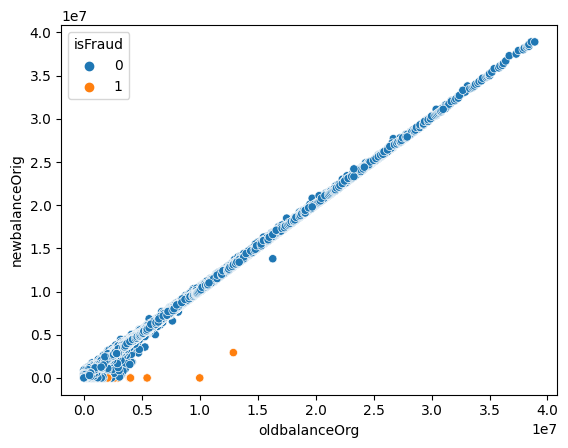

In [65]:
# بررسی ارتباط موجودی حساب مبدا قبل و بعد از تراکنش با بررسی تقلبی بودن یا نبودن آنها
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', data=data, hue='isFraud')

In [68]:
# میانگین مقادیر برای دو گروه تراکتش های درست و تقلبی
data.groupby('isFraud').mean(numeric_only=True)[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,
0,180476.435,882375.601,900833.917,941695.378,1192261.646
1,635893.197,628785.863,22947.865,220435.976,686695.008


In [21]:
# تعداد کل تراکنش های هر گروه از تراکنش ها
typ = data['type'].value_counts()
typ

PAYMENT     73427
CASH_OUT    66488
CASH_IN     41579
TRANSFER    16836
DEBIT        1670
Name: type, dtype: int64

<AxesSubplot: >

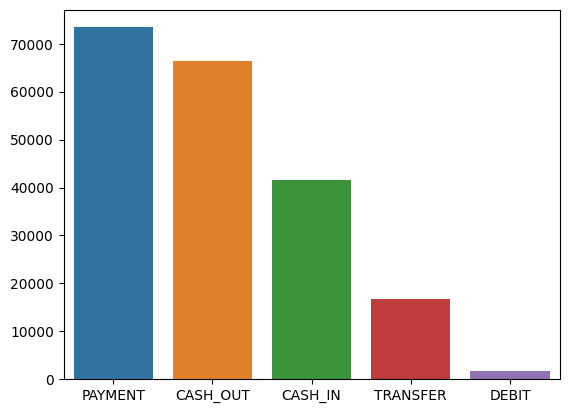

In [22]:
# رسم مقادیر سلول قبل روی نمودار
sns.barplot(x=typ.index, y=typ.values)

In [26]:
# بررسی ارتباط آماری هر ویژگی داده با تقلبی بودن یا نبودنش
correlation = data.corr(numeric_only=True)
correlation['isFraud'].sort_values(ascending=False)

isFraud           1.000000
amount            0.037494
oldbalanceOrg    -0.002484
newbalanceDest   -0.005160
oldbalanceDest   -0.008237
newbalanceOrig   -0.008486
step             -0.039102
isFlaggedFraud         NaN
Name: isFraud, dtype: float64

## Preprocessing data

In [28]:
# تبدیل مقادیر متنی نوع تراکنش به مقادیر عددی
data['type'] = data['type'].map({'PAYMENT':1, 'CASH_OUT':2, 'CASH_IN':3, 'TRANSFER':4, 'DEBIT':5})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,2,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [31]:
X = data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = data['isFraud']

In [34]:
# جدا کردن داده به دو قسمت آموزشی و تستی با نسبت 20 درصد
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

## Training Model

In [36]:
# ایجاد مدل جنگل تصادفی و آموزش آن با 100 درخت
model = RandomForestClassifier(n_estimators=100, random_state=69)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

## Evaluating Model

In [40]:
y_pred = model.predict(X_test)

In [47]:
# ارزیابی درصد جواب های درست مدل برای داده تستی
model.score(X_test, y_test)

0.99935

In [44]:
# ارزیابی جامع عملکرد مدل
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39968
           1       0.65      0.41      0.50        32

    accuracy                           1.00     40000
   macro avg       0.82      0.70      0.75     40000
weighted avg       1.00      1.00      1.00     40000



# @amirDataScience 
# Follow me on Instagram, Telegram